# UseCase: Churn Prediction

A travers ce usecase, le but de guider d'apprendre par la pratique comment faire de la prediction d'attrition des clients.
Il comporte les etapes suivantes :
0. Import des librairies
1. Donnees et problématiques majeures
2. Préparation des variables(features) informatives
3. Creation de modèles prédictifs, évaluation de performances
4. Calcul des predictions sur un nouveau jeu de données et évaluation

## 1. Import des librairies

- Tout d'abord, importons quelques packages necessaires pour ce travail

In [1]:
import pandas as pd
import numpy as np
import os
# Machine Learning tools
from sklearn.cross_validation import KFold, StratifiedKFold #, StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier
# Librairie de visualisation super cool
import seaborn as sns # pip install seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline

/Users/naima/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 2.  Données et problématiques majeures

CHURN PREDICTION IN THE TELECOMMUNICATIONS SECTOR   
In these days, due to challenges resulted from
global competition, customer churn represents one of the
significant concerns for companies in different industries. With
a churn rate of 30%, the telecommunication sector takes the
first place on the list. In order to solve this problem, predictive
models need to be implemented to identify customers who are
at risk of churning

Churn data set, in C. L. Blake and C. J. Merz, UCI Repository of Machine Learning
Databases, http://www.ics.uci.edu/∼mlearn/MLRepository.html, University
of California, Department of Information and Computer Science, Irvine, CA, 1998. Also
available at the book series Web site.

### 2.1 Chargement des données

- Charger les données disponibles au format csv: <b> churn.data </b>
- Determiner la dimension et le nombre de instances
- Afficher quelques lignes de la dataframe
- Analyse descriptive des variables (ex: State, Phone, ...)

In [2]:
#DATA_DIR=os.path.join('..', '..','datasets','churn')
# Charger les données d'apprentissage 
data = pd.read_csv(os.path.join("file:///Users/naima/Documents/cours%20master%20big%20data/Machine%20learning%20abiboula/devoir/churn_train.csv"), encoding='utf-8', sep=',')
print("churn train: {0}".format(data.shape))

churn train: (3333, 21)


In [3]:
pd.set_option("display.max_columns",99)
data.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


### 2.2 Analyse descriptive

Identifiant unique, target histogram, variables distribution
- Vérifier si variable manquantes

In [3]:
pd.isnull(data).values.any()

False

3333


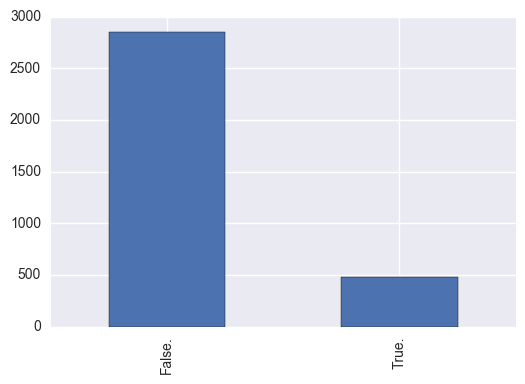

In [4]:
#data.describe()
print(len(data.Phone.value_counts()))
data["Churn?"].value_counts().plot(kind='bar')

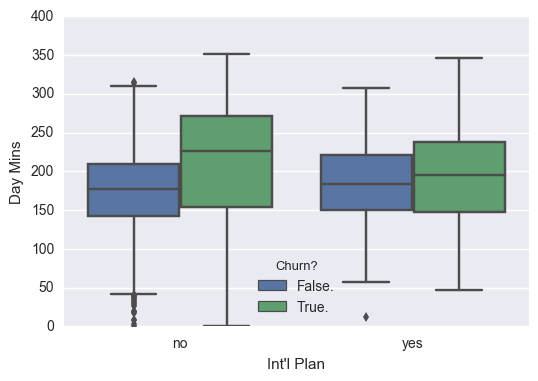

In [5]:
# Analyse des variables
sns.boxplot(x="Int'l Plan", y="Day Mins", hue="Churn?", data=data);

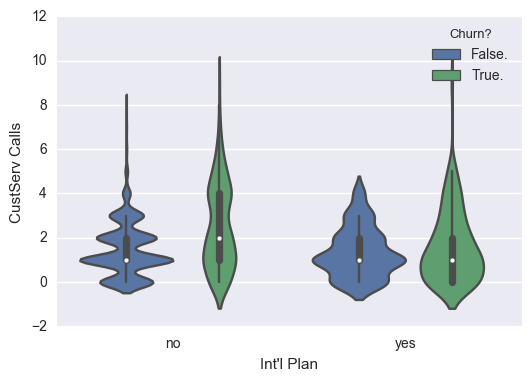

In [6]:
# Analyse des variables
sns.violinplot(x="Int'l Plan", y="CustServ Calls", hue="Churn?", data=data);

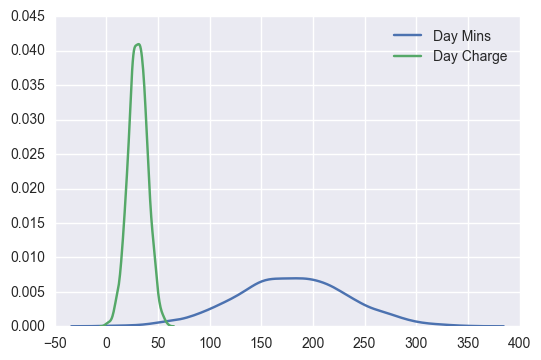

In [7]:
import warnings
warnings.filterwarnings("ignore")
sns.kdeplot(data['Day Mins'])#, bw=0.1)
sns.kdeplot(data['Day Charge'])#, bw=0.1)

### 2.2 Problématiques majeures liées à ces données

- Classes désequilibrées : 14.5% churn (print(data[data["Churn?"]=="True."].shape[0]/data.shape[0]))

## 3. Préparation des variables(features) informatives

### 3.1 Analyse/Encodage des variables

* Typologies des variables

In [8]:
vars_unique = ["Phone"]
vars_cat = ["Int'l Plan","VMail Plan", "State", "Churn?"]

* Encodage les features catégorielles en nombres, à l'aide de LabelEncoder()

In [9]:
from sklearn.preprocessing import LabelEncoder
# donnees catégorielles
le = dict()
# Encodage donnees catégorielles
print("Launch only on-time")
for c in vars_cat:
    print('encode:', c)
    le[c] = LabelEncoder()
    #data[c] = le[c].fit_transform(data[c]) #append(test[c]) # si catogories non couvertes
    le[c].fit(data[c])
    data[c] = le[c].transform(data[c])
    print(le[c].classes_)

Launch only on-time
encode: Int'l Plan
['no' 'yes']
encode: VMail Plan
['no' 'yes']
encode: State
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE'
 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT'
 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
encode: Churn?
['False.' 'True.']


In [10]:
# Affichage de la transfromation
data[[feat for feat in data.columns if feat not in vars_unique]].head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 3.2 Caractéristiques informatives

In [11]:
# target and features 
target_name = "Churn?"
features_cols = [ feat for feat in data.columns if feat not in vars_unique+[target_name] ]

Variables importance de RandomForest

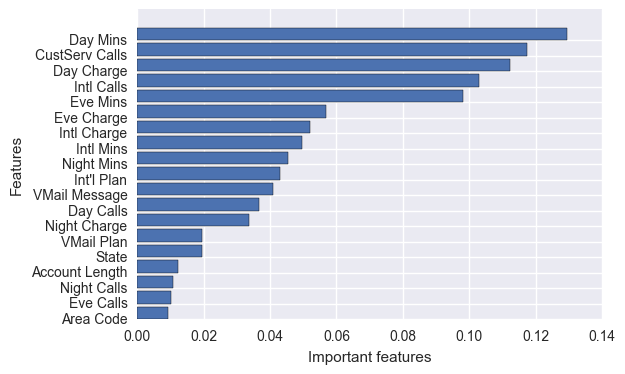

In [12]:
clf = GradientBoostingClassifier()
clf.fit(data[features_cols], data[target_name])
imp_feat, names0 = zip(*sorted(zip(clf.feature_importances_, data[features_cols].columns)))
topN=19
imp_feat, names = imp_feat[len(names0)-topN:], names0[len(names0)-topN:]
plt.barh(range(len(names)), imp_feat) #, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel("Important features")
plt.ylabel("Features")
plt.show()

## 4. Modèles prédictifs, évaluation de performances

### 4.1. Performance metrics

In [13]:
# L'évaluation de performance en classification désequiliblée nécessite des metrics specifiques
from sklearn import metrics

def decide(y_prob, threshold=0.5):
    return (y_prob > threshold)*1

def roc_auc(y_predict,y_origin):
    fpr, tpr, thresholds = metrics.roc_curve(y_predict,y_origin, pos_label=1)
    return 100.*metrics.auc(fpr, tpr)

def accuracy(y_predict,y_origin):
    return 100.*(sum(y_predict == y_origin))/len(y_origin)

def tp_rate(y_predict,y_origin):
    tp = sum((y_predict == 1) & (y_origin == 1))
    fn = sum((y_predict == 0) & (y_origin == 1))
    return 100.*(tp)/(tp + fn)

def tn_rate(y_predict,y_origin):
    tn = sum((y_predict == 0) & (y_origin == 0))
    fp = sum((y_predict == 1) & (y_origin == 0))
    return 100.*(tn)/(tn+fp)

## 4.2 Tuning des paramètres du classifieur

Les paramètres prinpaux à tuner pour avoir le meilleur classifieur sont :
- learning_rate : entre 0.0 to 0.2 , il s'agit de minimiser
- n_estimators : Determiner une valeur optimum
- max_depth ou min_samples_leaf.

On fera le tuning en 2 étapes :

Etape 1 : On fixera learning_rate pas trop faible à(0.05) pour trouver le nb_estimator optimum.

Etape 2 : Tuner les paramètres des arbres

Etape 3: Fixer les paramètres de l'arbre et tuner learning rate

Minimiser le paramètre "learning rate" et augmenter  "number of estimators" permet d'avoir un meilleur model

La métrique utilisée pour le GridSearch est 'recall_weighted' car c'est elle qui permet de determiner la capacité à detecter les vrais positifs (tb/tp+ fn)en prenant en compte le désequilibre de 2 classes

In [56]:
#Etape 1
param_test1 = {'n_estimators':range(3500,4001,100)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='recall_weighted',n_jobs=4, cv=5)
gsearch1.fit(data[features_cols], data[target_name])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_estimators': range(3500, 4001, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [57]:
print ("meilleurs valeurs de max_depth et n_estimators ", gsearch1.best_params_)
print( "Pour recall_weighted", gsearch1.best_score_)

meilleurs valeurs de max_depth et n_estimators  {'n_estimators': 3700}
Pour recall_weighted 0.944794479448


In [59]:
#Etape 2
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=3700, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='recall_weighted',n_jobs=4, cv=5)
gsearch2.fit(data[features_cols], data[target_name])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=3700, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': range(5, 16, 2), 'min_samples_split': range(200, 1001, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [60]:
print ("meilleurs paramètres ", gsearch2.best_params_)
print( "Pour recall_weighted ", gsearch2.best_score_)

meilleurs paramètres  {'max_depth': 11, 'min_samples_split': 200}
Pour recall_weighted  0.951395139514


In [66]:
import pylab as pl
param_test3 = {'learning_rate':pl.frange(0.01,0.05,0.01)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(max_depth=11, n_estimators=3700, subsample=0.8, 
min_samples_leaf=7, random_state=10, min_samples_split= 200), 
param_grid = param_test3, scoring='recall_weighted',n_jobs=4, cv=5)
gsearch3.fit(data[features_cols], data[target_name])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=11,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=7,
              min_samples_split=200, min_weight_fraction_leaf=0.0,
              n_estimators=3700, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'learning_rate': array([ 0.01,  0.02,  0.03,  0.04,  0.05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [69]:
print ("meilleurs paramètres ", gsearch3.best_params_)
print( "Pour recall_weighted ", gsearch3.best_score_)
gsearch3.grid_scores_

meilleurs paramètres  {'learning_rate': 0.01}
Pour recall_weighted  0.950795079508


[mean: 0.95080, std: 0.00580, params: {'learning_rate': 0.01},
 mean: 0.94839, std: 0.00549, params: {'learning_rate': 0.02},
 mean: 0.94779, std: 0.00549, params: {'learning_rate': 0.029999999999999999},
 mean: 0.94749, std: 0.00607, params: {'learning_rate': 0.040000000000000001},
 mean: 0.94629, std: 0.00610, params: {'learning_rate': 0.050000000000000003}]

### 4.2. Cross validation

instancier le classifieur avec les paramètres trouvés

In [70]:
clf = GradientBoostingClassifier(max_depth=11, n_estimators=3700, subsample=0.8, 
min_samples_leaf=7, random_state=10, min_samples_split= 200, learning_rate=0.01)

Estimer les vraies performances de notre modele nous allons utiliser le critère de validation croisee (cross-validation) methode k-fold.

In [71]:
NBROUND = 10
cum_auc, cum_acc = 0, 0 # accuracy & roc_auc
#clf = GradientBoostingClassifier()
#<??> Faire un benchmark pour trouver le modèle le plus performant avec ses paramètres optimaux
# Utiliser la stratification car les 2 classes sont désequilibrées
#for train_index, test_index in KFold(data.shape[0], n_folds=NBROUND):
for train_index, test_index in StratifiedKFold(data[target_name], shuffle=True, n_folds=NBROUND):
    y = data[target_name]
    X = data[features_cols]
    X_train, X_test = X.ix[train_index, :], X.ix[test_index, :]
    print(X_train.shape, X_test.shape)
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    auc, acc = roc_auc(pred, y_test), accuracy(pred, y_test)
    print(pred.shape, y_test.shape)
    cum_auc += auc 
    cum_acc += acc
    print("[AUC={0:.1f}% ACC={1:.1f}%  --> [TP={2:.1f}% TN={3:.1f}%]".format(auc, acc, tp_rate(pred, y_test), tn_rate(pred, y_test)))
print("*** Average ROC_AUC={0:.1f}% -- ACC={1:.1f}%".format(cum_auc/NBROUND, cum_acc/NBROUND))

(2999, 19) (334, 19)
(334,) (334,)
[AUC=94.9% ACC=95.2%  --> [TP=71.4% TN=99.3%]
(2999, 19) (334, 19)
(334,) (334,)
[AUC=93.1% ACC=95.2%  --> [TP=75.5% TN=98.6%]
(2999, 19) (334, 19)
(334,) (334,)
[AUC=91.0% ACC=93.1%  --> [TP=61.2% TN=98.6%]
(3000, 19) (333, 19)
(333,) (333,)
[AUC=91.2% ACC=94.3%  --> [TP=70.8% TN=98.2%]
(3000, 19) (333, 19)
(333,) (333,)
[AUC=93.8% ACC=96.1%  --> [TP=81.2% TN=98.6%]
(3000, 19) (333, 19)
(333,) (333,)
[AUC=91.1% ACC=94.9%  --> [TP=77.1% TN=97.9%]
(3000, 19) (333, 19)
(333,) (333,)
[AUC=93.2% ACC=95.5%  --> [TP=77.1% TN=98.6%]
(3000, 19) (333, 19)
(333,) (333,)
[AUC=90.5% ACC=93.7%  --> [TP=66.7% TN=98.2%]
(3000, 19) (333, 19)
(333,) (333,)
[AUC=92.1% ACC=94.3%  --> [TP=68.8% TN=98.6%]
(3000, 19) (333, 19)
(333,) (333,)
[AUC=95.8% ACC=96.4%  --> [TP=79.2% TN=99.3%]
*** Average ROC_AUC=92.7% -- ACC=94.9%


# Calcul des predictions et evaluation

### Reglage optimal et apprentissage du modèle

In [72]:
#<??> Appliquer les paramètres optimaux du modele
#clf = GradientBoostingClassifier()
#<??> On entraine de nouveau le modèle, cette fois sur l'intégralité des données
clf.fit(data[features_cols], data[target_name])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=11,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=7,
              min_samples_split=200, min_weight_fraction_leaf=0.0,
              n_estimators=3700, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False)

### Charger et encoder un nouveau jeu de données

In [73]:
# Charger les données test
test = pd.read_csv(os.path.join("file:///Users/naima/Documents/cours%20master%20big%20data/Machine%20learning%20abiboula/devoir/churn_test.csv"), encoding='utf-8', sep=',')
print("churn test: {0}".format(test.shape))

churn test: (1667, 21)


In [74]:
# ATTENTION: Encoder les variables catégorielles avant predictions
# => utiliser le même mapping le.
for c in vars_cat:
    print('encode:', c)
    test[c] = le[c].transform(test[c])
# Affichage de la transfromation
test[[feat for feat in test.columns if feat not in vars_unique]].head()

encode: Int'l Plan
encode: VMail Plan
encode: State
encode: Churn?


,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,11,101,510,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,26,137,510,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,35,103,408,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,32,99,415,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,40,108,415,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


### Evaluer et conclure

In [75]:
##<??> Calculs des predictions pour une nouvelle base de clients

new_pred = clf.predict(test[features_cols])

In [76]:
#<??> evaluer des performances en comparant les predictions et les valeurs references de churn? dans test
y_test = test["Churn?"]
y_test.shape
# calculer les perfs auc, acc, tp, tn (s'inspirer des calculs effectués dans la cellule cross-validation)

(1667,)

In [77]:
print(new_pred.shape, y_test.shape)

auc, acc = roc_auc(new_pred, y_test), accuracy(new_pred, y_test)
print("[AUC={0:.1f}% ACC={1:.1f}%  --> [TP={2:.1f}% TN={3:.1f}%]".format(auc, acc, tp_rate(new_pred, y_test), tn_rate(new_pred, y_test)))

(1667,) (1667,)
[AUC=94.1% ACC=95.6%  --> [TP=73.7% TN=99.0%]


### Evaluation 
Dans le cas du Churn la métrique la plus importante à observer et le taux des vrais positifs. 
Notre modèle a pu prédire 73,7% des clients qui ont churné, ce qui est uu score intéressant